<h1>Preparacion de Datos Proyecto 2</h1>
<h2>Grupo 5</h2>


<h3>Limpieza y preparacion de los datos</h3>

<h4>Descripción de los datos</h4>

* Análisis de los datos: contienen XXXX registros y XXX variables diferentes.

* Variables y tipos de datos: contiene XXX variables de las cuales XXX de ellas son numéricas. 

* XX son variables categóricas. 

* Variables Numéricas:

A continuación se ve información relevante sobre las variables numéricas:

XX se encuentra entre XX y XX, con una desviación estándar que sugiere una alta variabilidad de los datos (XX aproximadamente). 



<h4>Exploración de los datos:</h4>

Outliers: se presentan outliers en XXXX con respecto al diccionario de datos
    

<h4>Calidad de los datos:</h4>

Datos Duplicados: Se identificaron XX datos duplicados en el conjunto de datos.

Datos incompletos o vacíos: Se encontraron datos vacíos en las variables:

Datos categóricos en variables numéricas: Evento es un dato categórico que está representado con variable numérica. Debido a que de este dato no se conoce lo que representa o un rango de valores esperado se planea su eliminación ya que al momento de interpretar la información del modelo no se tendrá claro su significado. 

Problemas de validez de datos: 

<h4>Entendimiento de datos:</h4>

Datos duplicados: Se eliminan los datos duplicados

Datos incompletos o vacíos: 


Se eliminan los valores atípicos ya que pueden afectar negativamente al modelo.

Finalmente, el conjunto de datos posee XXXX registros y XXX variables

<h4> 0. Carga de librerías necesarias para implementación y carga de datos</h4>

In [1]:
import os

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import ydata_profiling as pp

from sklearn.cluster import AgglomerativeClustering

import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder



from ydata_profiling import ProfileReport

from matplotlib import cm

import warnings
# Ignorar la advertencia RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="The figure layout has changed to tight", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.", category=FutureWarning)

In [3]:
# Se cargan los datos. 
df_hogar = pd.read_csv('data/2017Composicion del hogar y demografia ( Capitulo E).csv',  sep=';',encoding="ISO-8859-1")
# se carga el diccionario
df_diccio = pd.read_excel('data/Diccionario_anonimizado_DANE_EM2021.xlsx')

<strong><h4>1. Entendimiento de los datos</h4></strong>

Para entender los datos se considera importante entender la cantidad de datos que se tiene, verificar cuantas columnas y filas tienen los datos proporcionados

In [4]:
df_dim = df_hogar.shape
print(">> El dataframe contiene {} columnas y {} filas\n".format(df_dim[1], df_dim[0]))
print(">> El dataframe se ve de la siguiente forma: ")
df_hogar.head()

>> El dataframe contiene 56 columnas y 319952 filas

>> El dataframe se ve de la siguiente forma: 


,ï»¿DIRECTORIO_PER,DIRECTORIO_HOG,DIRECTORIO,SECUENCIA_P,ORDEN,NPCEP4,NPCEP5,NPCEP6,NPCEP7,NPCEP8,...,NPCEP22,NPCEP22A,NPCEP24,NPCEP24A,NPCEP25,NPCEP25A,NPCEP27,NPCEP26,NPCEP5A,FEX_C
0,10100011,1010001,101000,1,1,56,1,1,6,1,...,1,3,2,,2,,1,2,1,"16,604442041"
1,10100012,1010001,101000,1,2,48,2,2,6,1,...,1,2,2,,10,,1,1,2,"16,604442041"
2,10100013,1010001,101000,1,3,22,2,3,5,,...,,,1,2,,,1,1,2,"16,604442041"
3,10100111,1010011,101001,1,1,42,1,1,6,1,...,1,4,2,,3,4,1,2,1,"26,046357048"
4,10100112,1010011,101001,1,2,43,2,2,6,1,...,1,1,2,,1,3,1,1,2,"26,046357048"


In [5]:

pd.set_option('display.max_colwidth', None)
df_diccio.rename(columns={'ï»¿Variable name': 'Column'}, inplace=True)
print(">> El diccionario de datos es el siguiente: ")
df_diccio[['NOMBRE COLUMNA', 'TEXTO_PREGUNTA']]

>> El diccionario de datos es el siguiente: 


,NOMBRE COLUMNA,TEXTO_PREGUNTA
0,DIRECTORIO,Identificador numérico de vivienda
1,DPTO,1. Departamento
2,MPIO,2. Municipio
3,CLASE,clase
4,COD_LOCALIDAD,Código de la localidad
...,...,...
1588,NHCMP12AUA24,12.2.25.25 Insumos para actividades agrícolas del hogar. Solo Bogotá rural y municipios ¿En cuánto estima el valor obtenido
1589,NHCMP12AUB24_1,12.2.25. ¿Cómo lo obtuvieron? 1 Tomado de un negocio del hogar\nInsumos para actividades agrícolas del hogar. Solo Bogotá rural y municipios
1590,NHCMP12AUB24_2,12.2.25 ¿Cómo lo obtuvieron? 2 Recibido como pago por trabajo\nInsumos para actividades agrícolas del hogar. Solo Bogotá rural y municipios
1591,NHCMP12AUB24_3,12.2.25 ¿Cómo lo obtuvieron? 3 Regalado\nInsumos para actividades agrícolas del hogar. Solo Bogotá rural y municipios


<h5>1.1. Entendimiento de contenido</h5>

Se visualizan las variables para identificar tendencias, correlaciones y posibles valores atípicos que pueden afectar nuestro proceso de análisis y toma de decisiones. 

>> Se visualizan los datos en conjunto: 


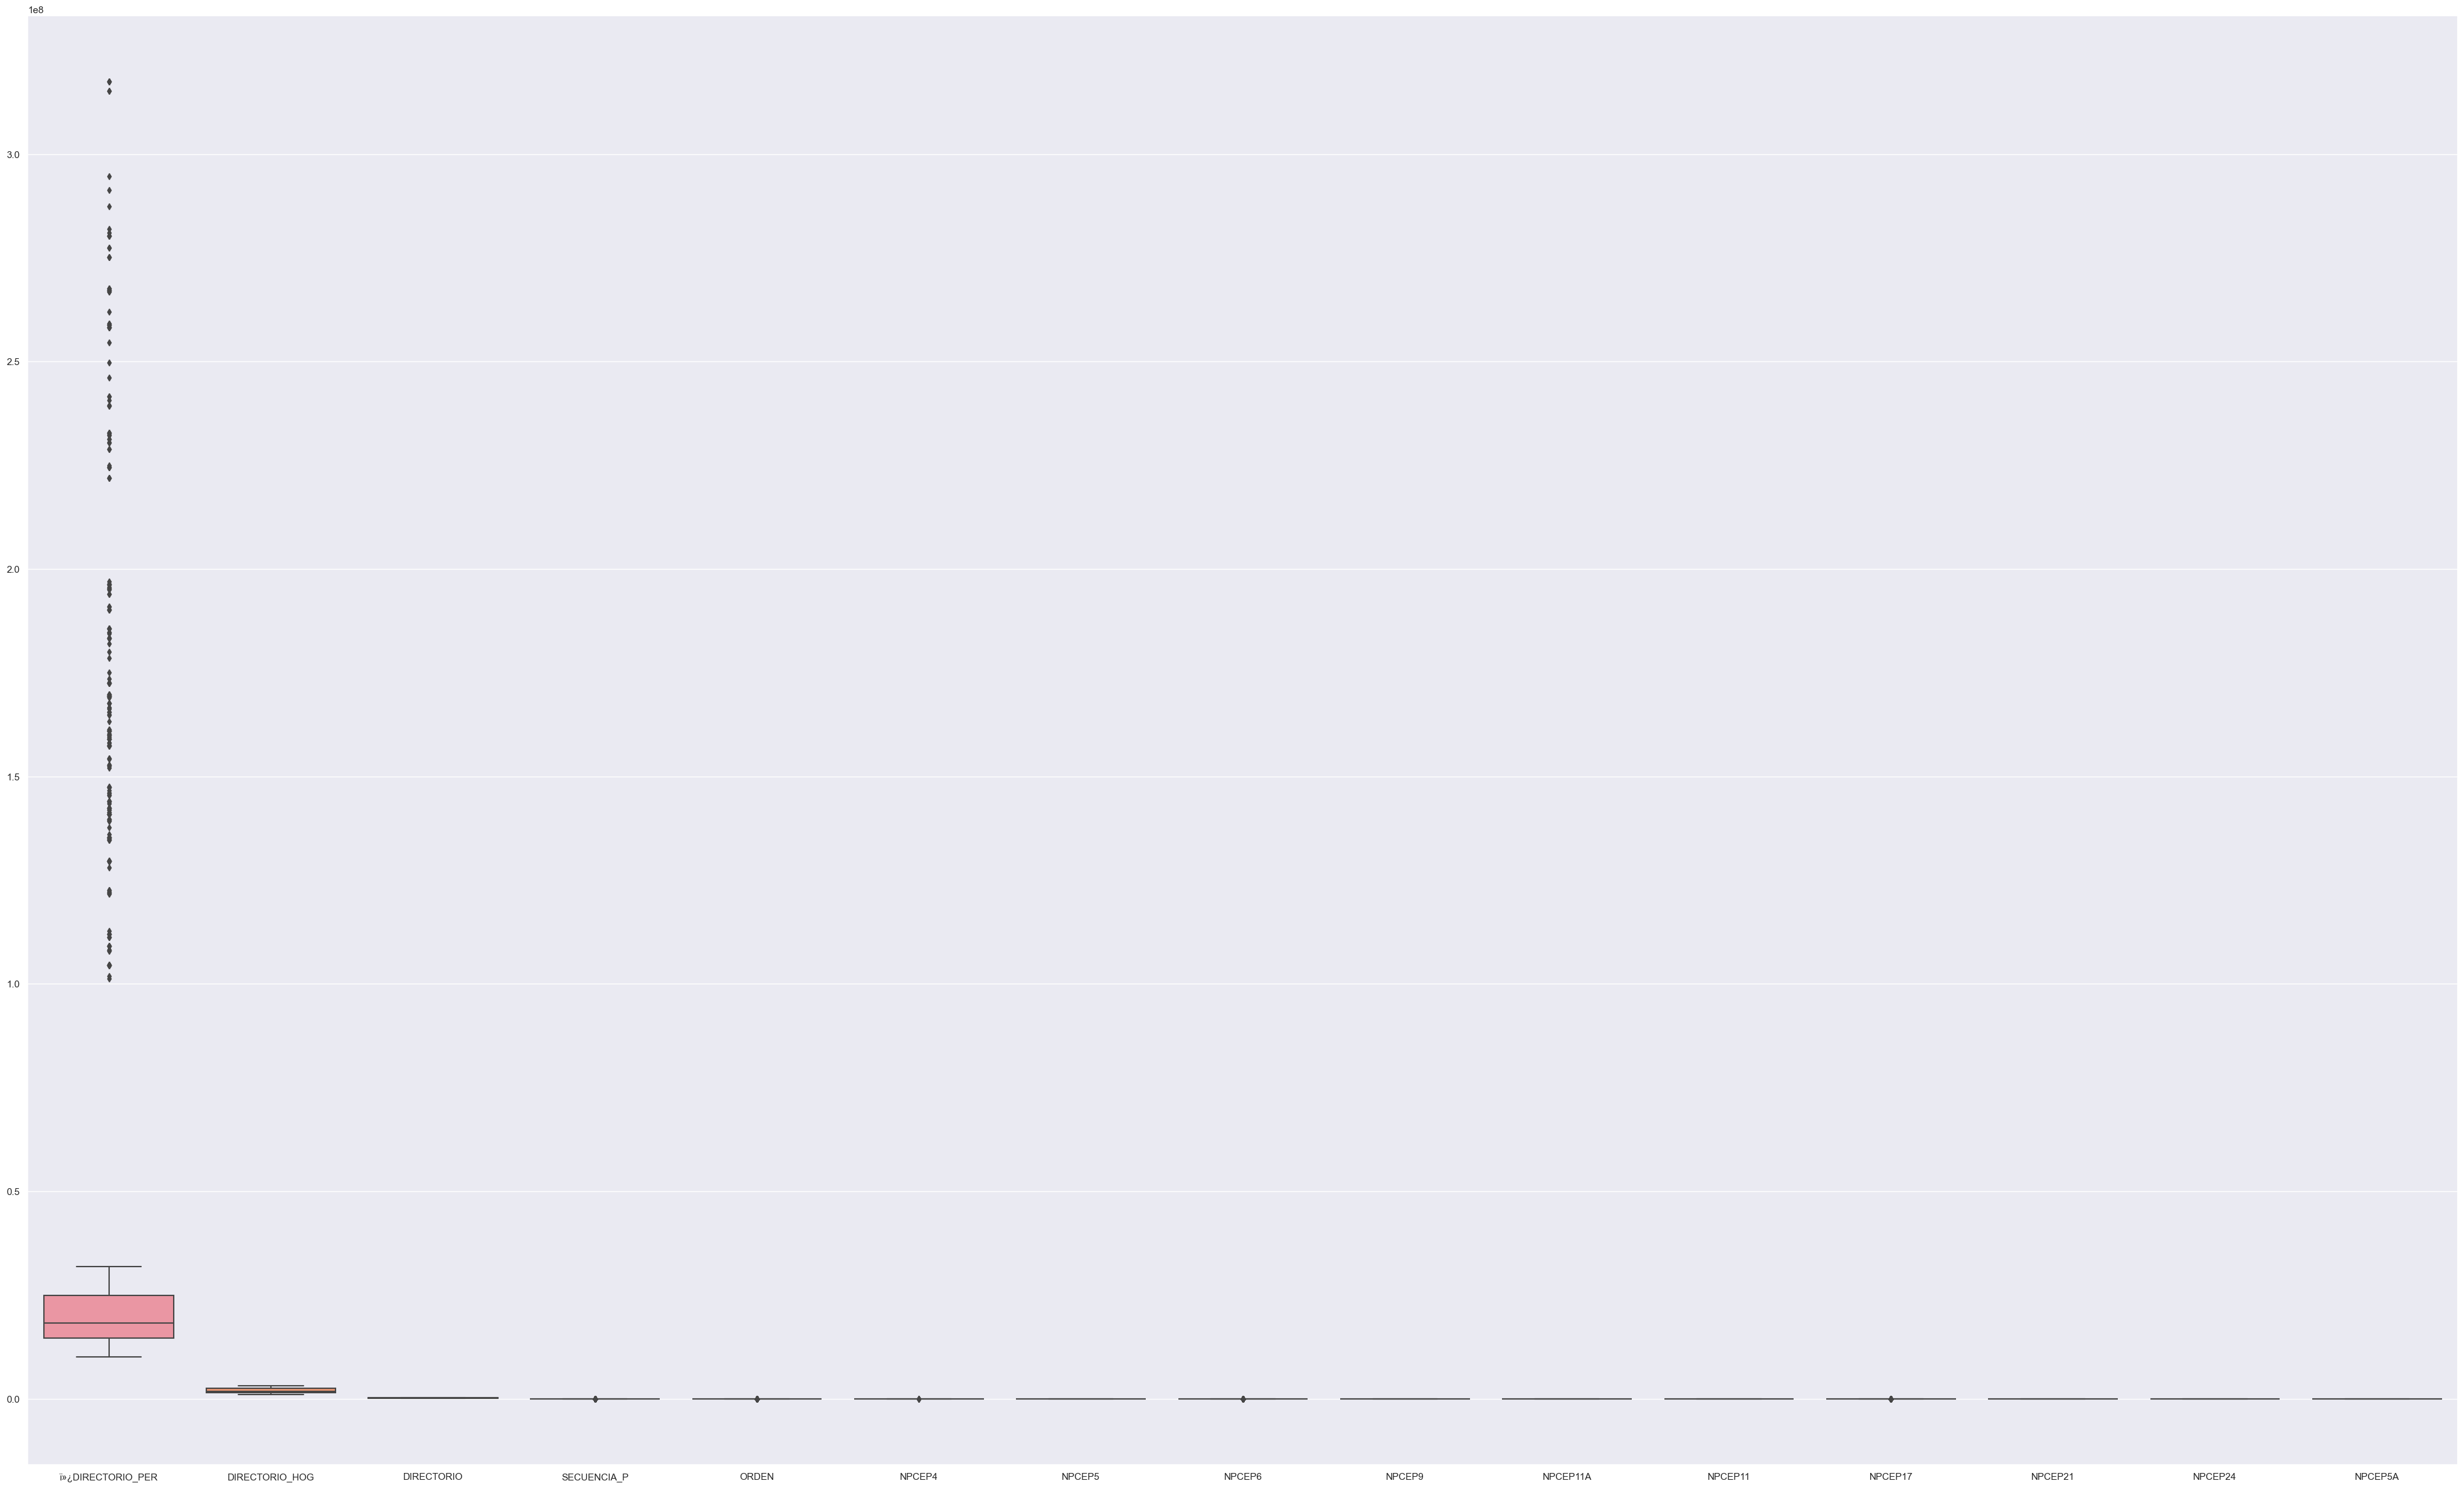

In [6]:
# Visualización de todas las variables
fig = plt.figure(figsize=(50, 30))
ax = sns.boxplot(data=df_hogar, orient="v")
print(">> Se visualizan los datos en conjunto: ")
plt.show()

Ya que se tienen escalas significativamente diferentes, se procede a normalizar los datos, para que que cada columna contribuya de manera igual al análisis y evitar cualquier sesgo causado por las diferencias en las escalas.

Para normalizar los datos, utilizaremos la técnica de escala Min-Max, que transforma cada valor en una columna a un valor entre 0 y 10 basado en los valores mínimo y máximo en esa columna.

Una vez que los datos estén normalizados, podemos proceder con el entendimiento de los datos al poder observarlos mejor.


<h5>1.2. Calidad de datos</h5>

En esta sección se identifican los datos que son incorrectos.

In [7]:
print(">> Se puede observar la información detallada de cada columna:\n")
df_hogar.info()

>> Se puede observar la información detallada de cada columna:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319952 entries, 0 to 319951
Data columns (total 56 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ï»¿DIRECTORIO_PER  319952 non-null  int64 
 1   DIRECTORIO_HOG     319952 non-null  int64 
 2   DIRECTORIO         319952 non-null  int64 
 3   SECUENCIA_P        319952 non-null  int64 
 4   ORDEN              319952 non-null  int64 
 5   NPCEP4             319952 non-null  int64 
 6   NPCEP5             319952 non-null  int64 
 7   NPCEP6             319952 non-null  int64 
 8   NPCEP7             319952 non-null  object
 9   NPCEP8             319952 non-null  object
 10  NPCEP8A            319952 non-null  object
 11  NPCEP9             319952 non-null  int64 
 12  NPCEP9A            319952 non-null  object
 13  NPCEP9B            319952 non-null  object
 14  NPCEP10            319952 non-null  object
 15  NPCE

In [8]:
#non_numeric_balance = df_plantas[pd.to_numeric(df_plantas['Luz'], errors='coerce').isnull()]
#print(">> A continuación se muestran los datos no numéricos de la columna:\n")
#print(non_numeric_balance[['No', 'Microbio']])


<h5>Análisis de completitud, unicidad y validez</h5>

In [9]:
pd.set_option('display.max_rows', None)

# Calcula los porcentajes de valores nulos en cada columna y muéstralos
print(">> Los porcentajes de valores nulos en cada columna son los siguientes: ")
print((df_hogar.isnull().sum() / len(df_hogar) * 100).sort_values(ascending=False))


>> Los porcentajes de valores nulos en cada columna son los siguientes: 
ï»¿DIRECTORIO_PER    0.0
DIRECTORIO_HOG       0.0
NPCEP16E             0.0
NPCEP16F             0.0
NPCEP16G             0.0
NPCEP16H             0.0
NPCEP16I             0.0
NPCEP16J             0.0
NPCEP16K             0.0
NPCEP16A1            0.0
NPCEP16AA            0.0
NPCEP16AB            0.0
NPCEP16B1            0.0
NPCEP17              0.0
NPCEP18              0.0
NPCEP19              0.0
NPCEP21              0.0
NPCEP21A             0.0
NPCEP22              0.0
NPCEP22A             0.0
NPCEP24              0.0
NPCEP24A             0.0
NPCEP25              0.0
NPCEP25A             0.0
NPCEP27              0.0
NPCEP26              0.0
NPCEP5A              0.0
NPCEP16D             0.0
NPCEP16C             0.0
NPCEP16B             0.0
NPCEP9B              0.0
DIRECTORIO           0.0
SECUENCIA_P          0.0
ORDEN                0.0
NPCEP4               0.0
NPCEP5               0.0
NPCEP6               0.0
NP

In [ ]:
profile = ProfileReport(df_hogar, title="Reporte de Hogar y Demografía 2017")
profile.to_notebook_iframe()
profile.to_file("2017HogarYDemografia.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]